# RandomizedSearch y K-Fold estratificado

Importamos las librerías necesarias

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint

Cargamos el conjunto de datos de los dígitos para clasificación multiclase

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

Separamos en conjunto de entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

Inicializamos un árbol de decisión y un espacio de búsqueda de parámetros

In [4]:
dt = DecisionTreeClassifier()

# Espacio de búsqueda
param_dist = {
    "max_depth": randint(5, 50),
    "min_samples_split": randint(2, 30),
    "min_samples_leaf": randint(1, 20),
    "criterion": ["gini", "entropy", "log_loss"],
    "max_features": [None, "sqrt", "log2"]
}

In [7]:
randint(5, 50)

Inicializamos un objeto StratifiedKFold. Este último ayuda a mantener el mismo porcentaje de clases en cada partición del conjunto de datos.

In [5]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=60,
    scoring="f1_macro",   # mejor para multiclase
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

Ajustamos el modelo y evaluamos

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejores hiperparámetros encontrados:
{'criterion': 'log_loss', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 9}

Accuracy: 0.8166666666666667

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        54
           1       0.73      0.73      0.73        55
           2       0.80      0.83      0.81        53
           3       0.81      0.87      0.84        55
           4       0.83      0.91      0.87        54
           5       0.83      0.87      0.85        55
           6       0.88      0.91      0.89        54
           7       0.77      0.80      0.78        54
           8       0.64      0.69      0.67        52
           9       0.95      0.69      0.80        54

    accuracy                           0.82       540
   macro avg       0.82      0.82      0.82       540
weighted avg       0.82     

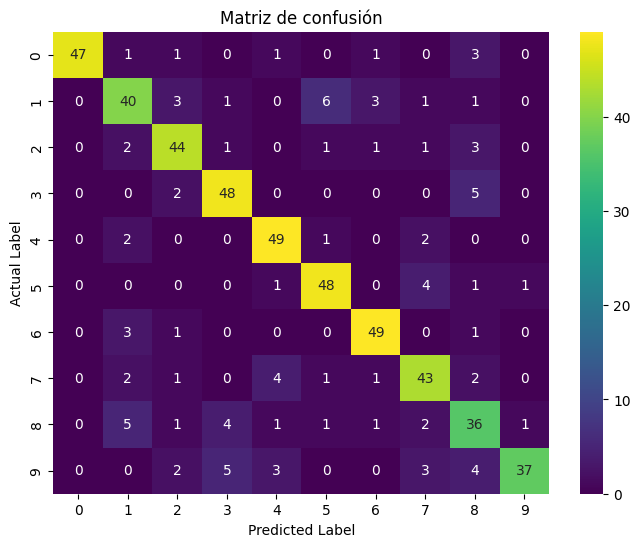

In [14]:
random_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='d',
            cmap='viridis'
           )
plt.title('Matriz de confusión')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()